In [16]:
from scipy.linalg import toeplitz,solve_toeplitz
from scipy.signal import correlate,convolve
from scipy.fft import fft,ifft
import numpy as np
import matplotlib.pyplot as plt

from obspy import Trace
import obspy

def predict_RF(trace,*args,**kwargs):
    """
    this method is developed from 朱洪翔 et.al 2018 地球物理学报
    here step represent m in equation 5,
    m+a=接收函数总长
    a值略大于多次波周期，最好非常接近。
    """
    size = trace.shape[0]
    m = kwargs.get("m",30)
    b = kwargs.get("b", 0.001)
    trace[0] *= (1+b)
    method = kwargs.get("method", "direct")
    cor = correlate(trace,trace,
                    method=method, mode="full")[size-1:]
        
    a = _pick_measure(cor)
    c_mat = solve_toeplitz( (cor[0:m], cor[0:m]), cor[a : a+m ])

    d = np.zeros(a+m)
    d[0] = 1
    d[a : ] = (-1 * c_mat)

    return convolve(d,trace.data,mode="full",method=method)

def rebel_rf(trace:np.ndarray,*args,**kwargs):
    Fs = 1/kwargs.get("delta",0.1)
    size = trace.shape[0]
    omega = 2*np.pi*np.arange(size)*Fs/size
    
    method = kwargs.get("method", "direct")
    cor = correlate(trace,trace,
                    method=method, mode="full")[size-1:]
    cor = cor/cor[0]
    
    dt = _pick_measure(cor)
    r0 = -cor[dt]
    print(r0,dt)
    dt /= Fs
    
    filter = 1+r0*np.exp(-1j *omega*dt)
    return ifft(np.multiply(fft(trace),filter)).real
    


def _pick_measure(conv):
    """
    get first trough and first pick in conv
    Parameters
    ----------
    conv : correlated RF
    """
    sig = np.sign(np.diff(conv))
    sig = np.diff(sig)
    
    return np.where(sig>0)[0][0]+1
    


943


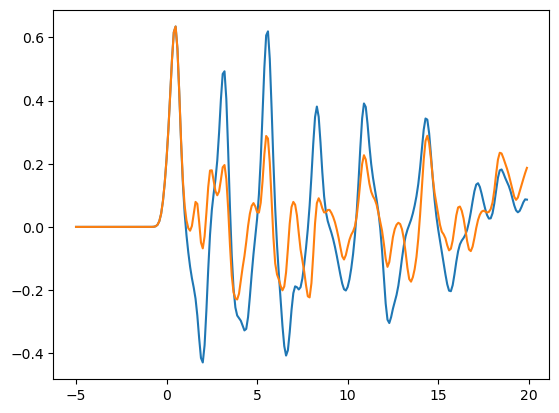

In [18]:

st=obspy.read("/home/jous/Desktop/F/project/public/X2.15683/X2.15683.2016262072556.00.ri")
trace = st[0].data;method = "direct";size = 900
a=predict_RF(st[0].data)
print(len(a))
line = np.arange(250)/10-5
plt.plot(line,trace[:250])
plt.plot(line,a[:250])




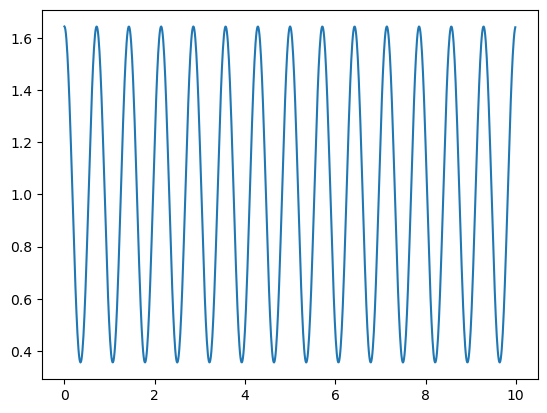

In [6]:
a=np.zeros(900)
a[0]=1;a[14]=0.6437
plt.plot(np.arange(900)/900*10,fft(a))